Case study on unsupervised learning

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('/content/Wine_clust .csv')

In [20]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Check the basic details of the dataset

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


There is no null values in the data set

In [24]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Selecting two columns to perform the K means Clustering on.

In [25]:
X = data.iloc[:,[0,9]].values

Elbow method

In [26]:
from sklearn.cluster import KMeans

In [37]:
wcss =[]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

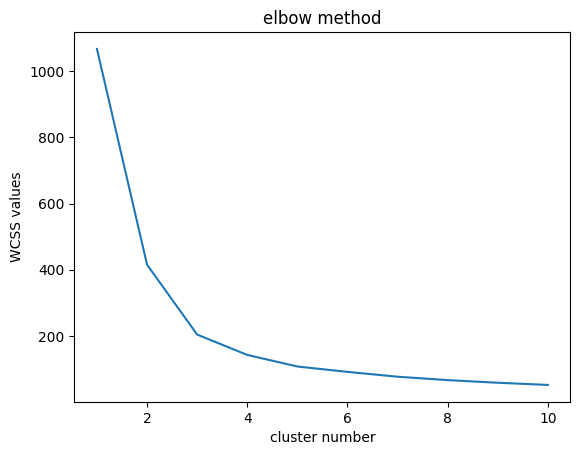

In [38]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('cluster number')
plt.ylabel('WCSS values')
plt.show()

number of clusters is 3

K Means model

In [33]:
kmeans=KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
y_kmeans= kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

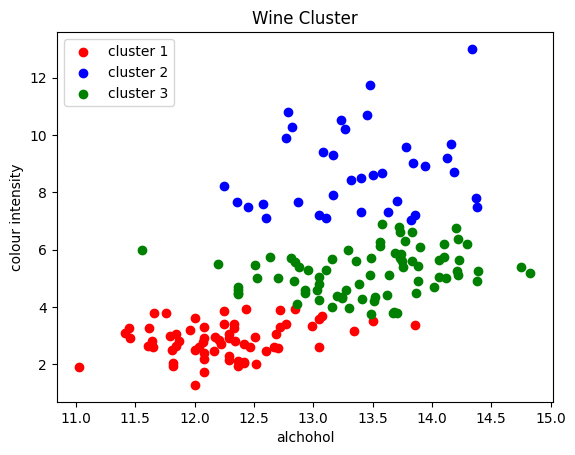

In [35]:
plt.scatter(X[y_kmeans == 0 ,0], X[y_kmeans ==0 ,1], c='red', label='cluster 1')
plt.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1,1], c='blue', label='cluster 2')
plt.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2 ,1], c='green', label='cluster 3')
plt.xlabel('alchohol')
plt.ylabel('colour intensity')
plt.title('Wine Cluster')
plt.legend()
plt.show()

Agglomerative Hierarchical clustering

In [39]:
X = data.iloc[:,[0,9]].values

Find number of clusters

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

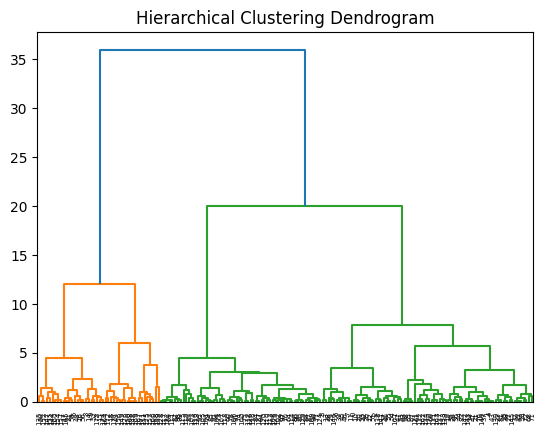

In [45]:
import scipy.cluster.hierarchy as sch
dend= sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")

number of cluster=3

In [55]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

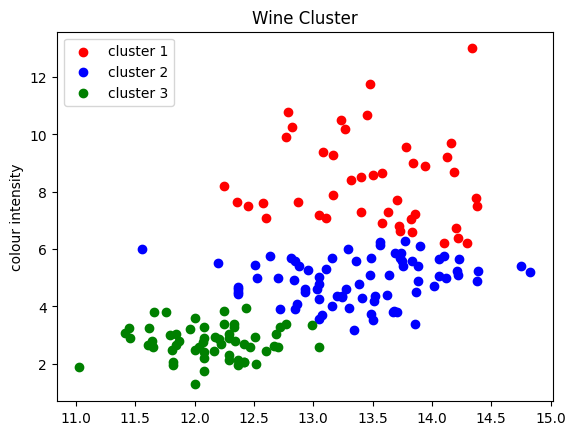

In [57]:
plt.scatter(X[y_hc == 0 ,0], X[y_hc ==0 ,1], c='red', label='cluster 1')
plt.scatter(X[y_hc == 1 ,0], X[y_hc == 1,1], c='blue', label='cluster 2')
plt.scatter(X[y_hc == 2 ,0], X[y_hc == 2,1], c='green', label='cluster 3')
plt.ylabel('colour intensity')
plt.title('Wine Cluster')
plt.legend()
plt.show()

silhouette score

In [58]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(X, y_hc)
print (sil)

0.49450267226125566


DBSCAN Clustering

In [62]:
X = data.iloc[:,[0,9]].values

In [63]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_db= dbscan.fit_predict(X)
y_db


array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1, -1,  1, -1,  0,
       -1,  0,  0,  1,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1, -1,  1,  1,
        0, -1, -1,  0,  0, -1, -1,  1])

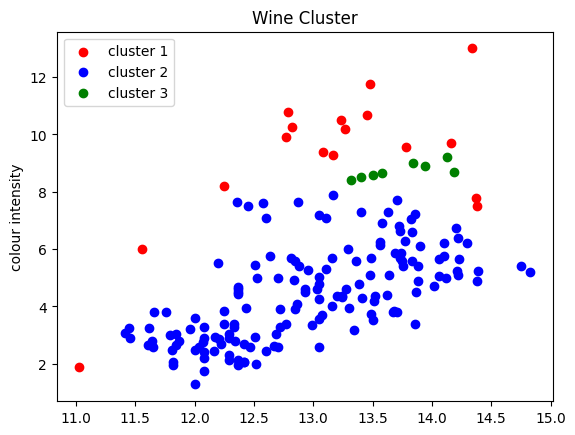

In [64]:
plt.scatter(X[y_db == -1,0], X[y_db ==-1 ,1], c='red', label='cluster 1')
plt.scatter(X[y_db == 0 ,0], X[y_db == 0,1], c='blue', label='cluster 2')
plt.scatter(X[y_db == 1 ,0], X[y_db == 1,1], c='green', label='cluster 3')
plt.ylabel('colour intensity')
plt.title('Wine Cluster')
plt.legend()
plt.show()

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.3, min_samples=5)
y_db= dbscan.fit_predict(X)
y_db


array([ 2,  0, -1, -1,  0, -1,  1,  1, -1, -1,  2,  1,  2, -1, -1, -1, -1,
        3, -1, -1,  2,  0,  5, -1,  5, -1,  0,  5,  0, -1,  2,  3,  5,  2,
        0, -1,  0,  0, -1,  1,  2,  0,  2,  0,  0,  1,  1,  2, -1, -1, -1,
        2,  3,  2,  2,  2, -1,  2,  3,  4,  4, -1,  5, -1,  4, -1,  0, -1,
       -1,  4,  4, -1,  5, -1,  4, -1,  0,  4,  4,  4,  4, -1,  4,  0,  4,
        4,  4,  4,  4, -1,  4, -1,  4,  4,  4,  4,  4,  4, -1,  4,  4,  4,
        4,  4,  4,  4,  4, -1,  4,  4,  4,  4, -1, -1,  4, -1, -1,  4, -1,
       -1, -1, -1,  4, -1,  4,  4, -1,  4,  4,  4,  0, -1, -1, -1, -1, -1,
       -1, -1,  2,  0,  0,  2,  0,  0, -1,  0,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  0, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

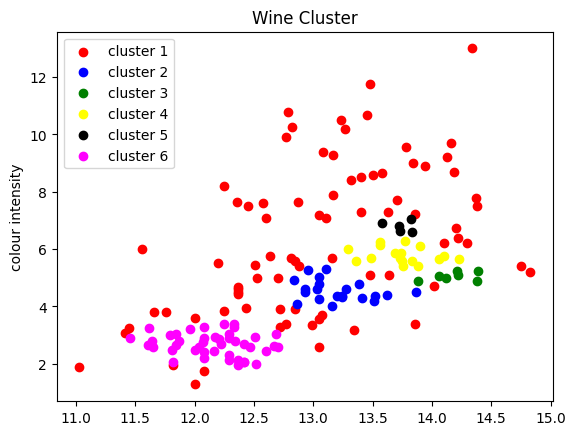

In [71]:
plt.scatter(X[y_db == -1,0], X[y_db ==-1 ,1], c='red', label='cluster 1')
plt.scatter(X[y_db == 0 ,0], X[y_db == 0,1], c='blue', label='cluster 2')
plt.scatter(X[y_db == 1 ,0], X[y_db == 1,1], c='green', label='cluster 3')
plt.scatter(X[y_db == 2 ,0], X[y_db == 2 ,1], c='yellow', label='cluster 4')
plt.scatter(X[y_db == 3 ,0], X[y_db == 3,1], c='black', label='cluster 5')
plt.scatter(X[y_db == 4 ,0], X[y_db == 4,1], c='magenta', label='cluster 6')

plt.ylabel('colour intensity')
plt.title('Wine Cluster')
plt.legend()
plt.show()